In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import itertools
from matplotlib import cm

import os
import seaborn as sns
from os import listdir
from os.path import isfile, join
import scipy.stats as stats

In [2]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 12}

mpl.rc('font', **font)

In [21]:
csvname = 'test_maps.csv'
mypath = f'/Volumes/SAF_Data/NAYS2DH_files/Data/BarCSVs/Sp2022/Summer-redo/{csvname}'
allbars = pd.read_csv(mypath, header=0)

allbars['CVFlowDepth'] = allbars['SDFlowDepth']/allbars['MeanFlowDepth']
allbars['Skew Abs'] = abs(allbars['Angle Skewness'])
savefilesto = '/Volumes/SAF_Data/Colloquium22/scratch'

In [44]:
# df.loc[ df[“column_name”] == “some_value”, “column_name”] = “value”
allbars['Skew Binned'] = allbars['Skew Abs']
allbars.loc[np.logical_or(allbars['Skew Abs'] > 1, allbars['Skew Abs'] < 3), 'Skew Binned'] = 1
allbars.loc[allbars['Skew Abs'] < 1, 'Skew Binned'] = 0
allbars.loc[allbars['Skew Abs'] > 3, 'Skew Binned'] = 2

In [47]:
allbars['BSR Binned'] = allbars['Basal Surf Relief']
allbars.loc[np.logical_or(allbars['Basal Surf Relief'] > 0.5, allbars['Basal Surf Relief'] < 1), 'BSR Binned'] = 1
allbars.loc[allbars['Basal Surf Relief'] < 0.5, 'BSR Binned'] = 0
allbars.loc[allbars['Basal Surf Relief'] > 1, 'BSR Binned'] = 2

(array([ 6.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0., 12.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

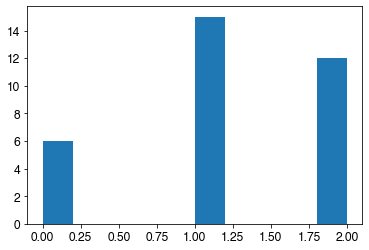

In [48]:
plt.hist(allbars['BSR Binned'])

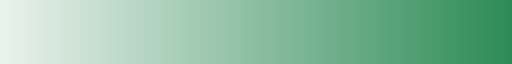

In [23]:
sns.light_palette("seagreen", as_cmap=True)

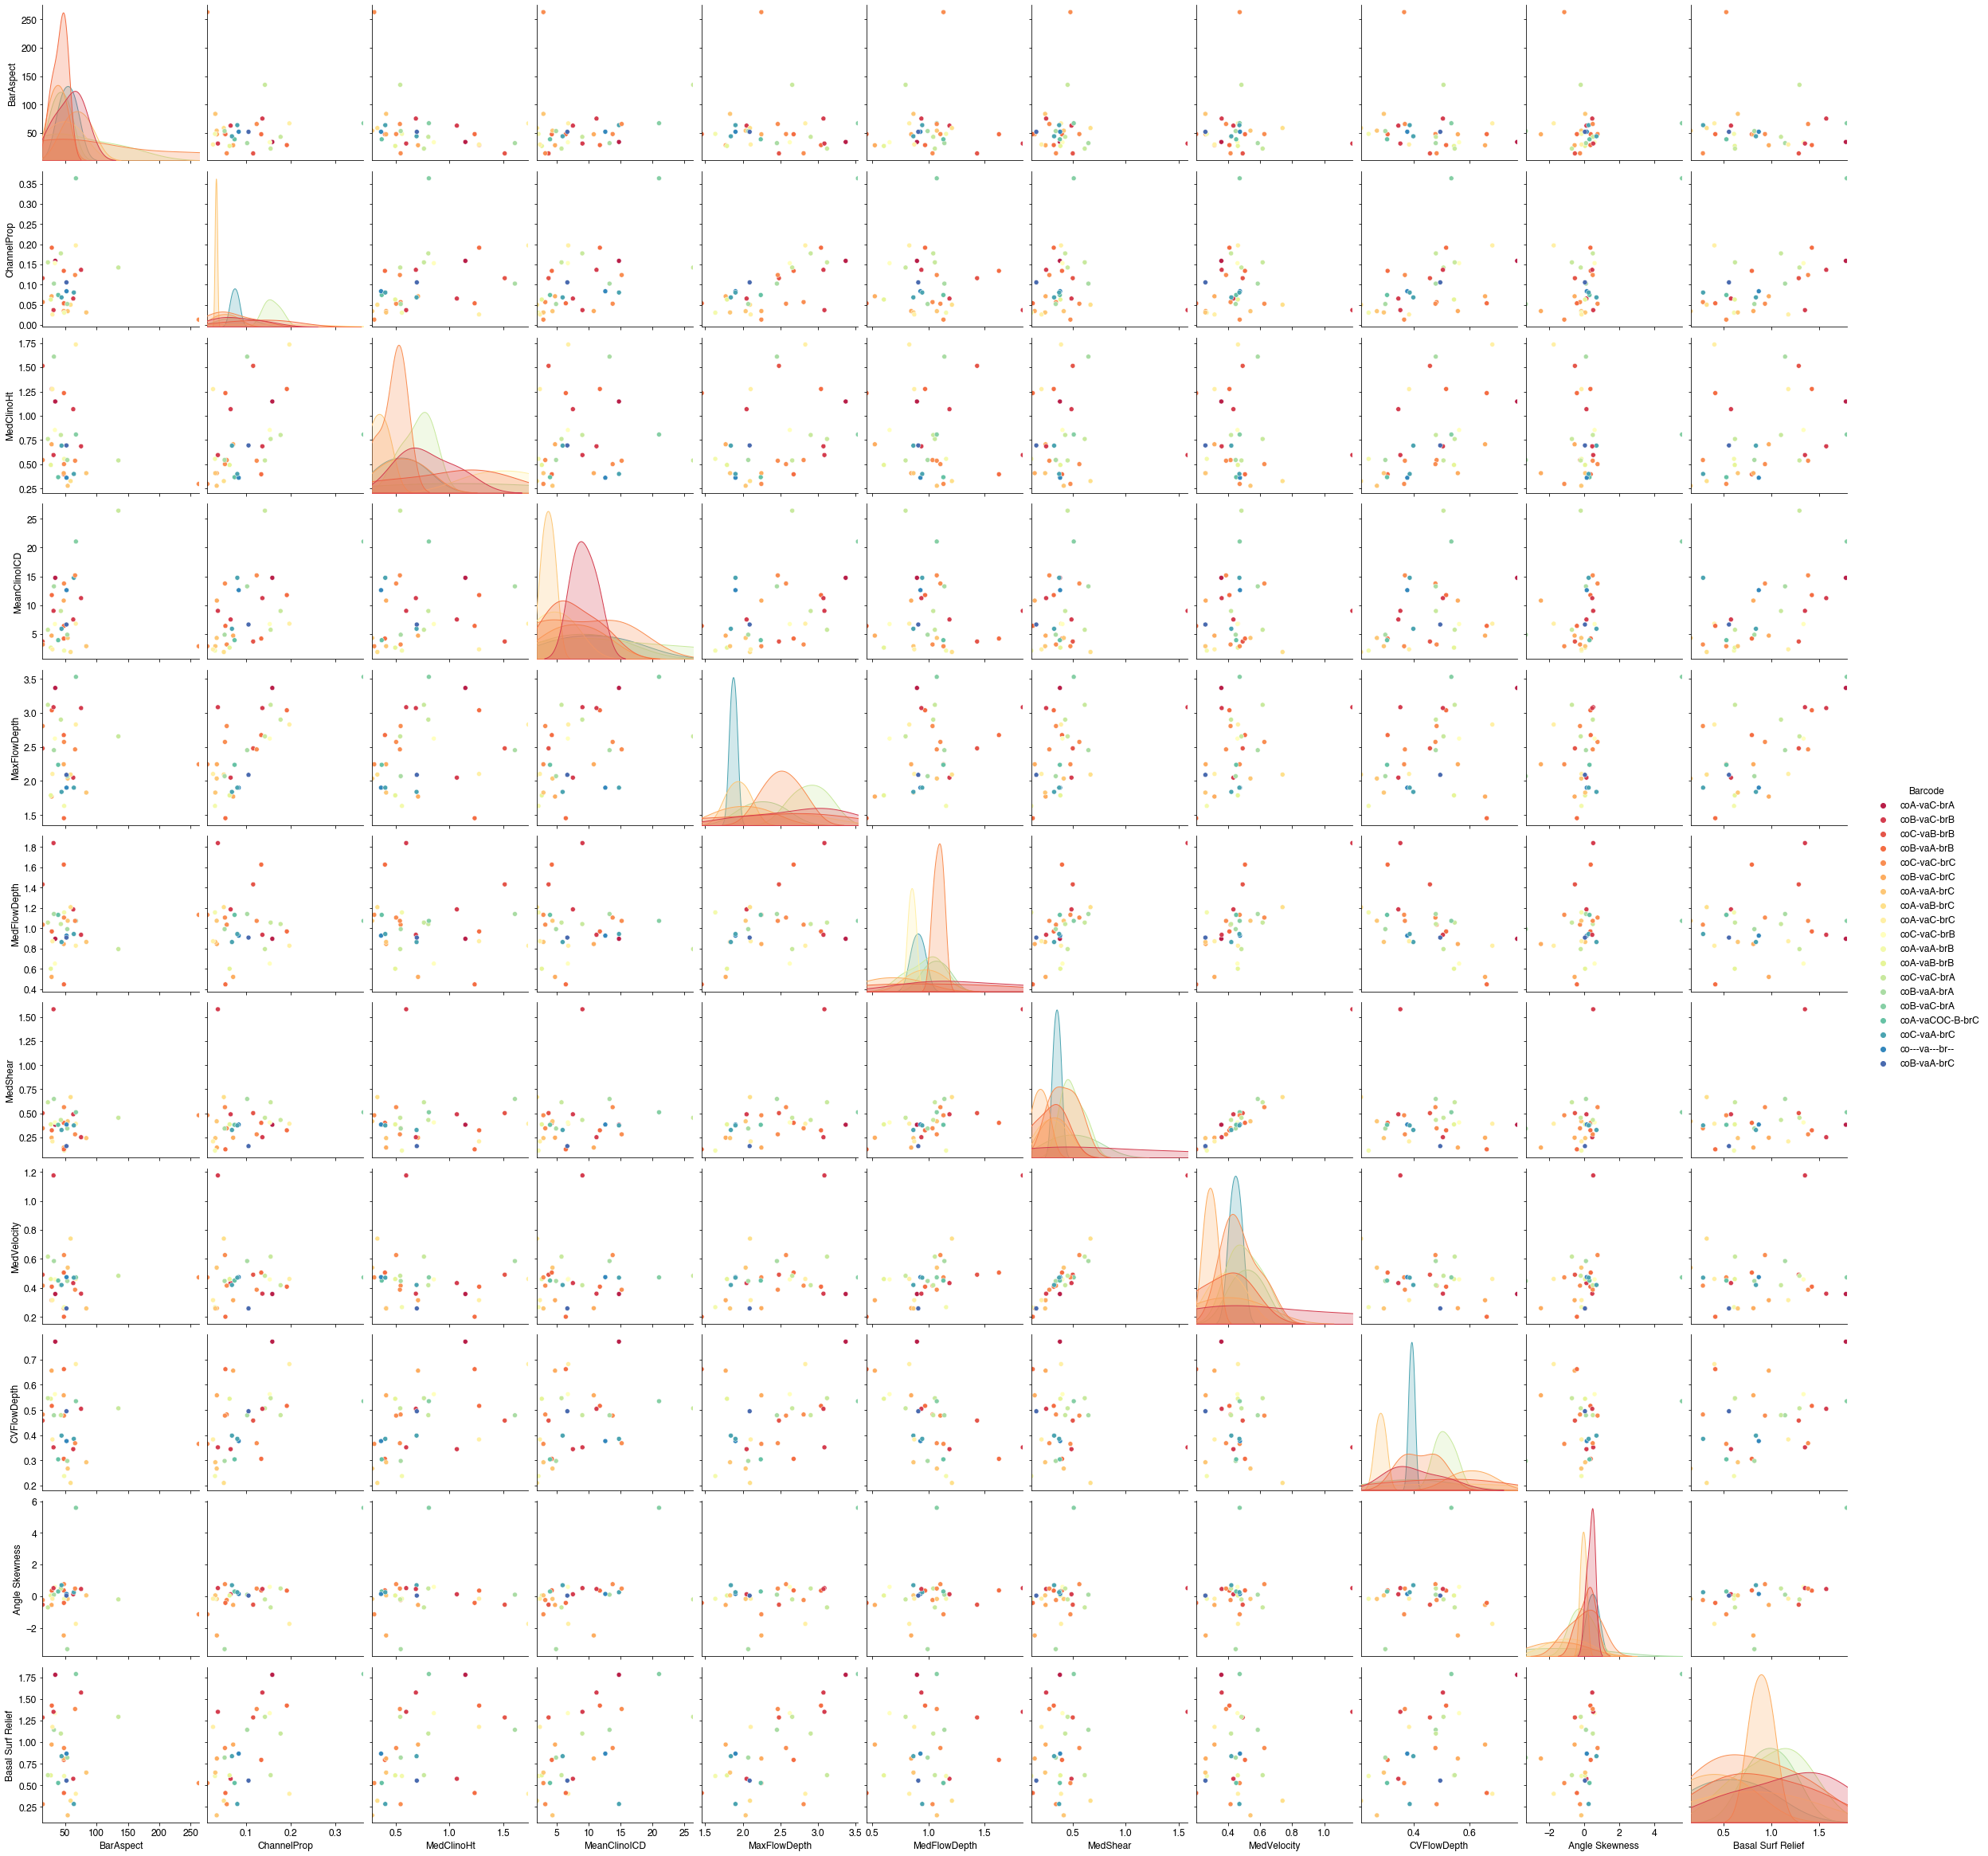

In [21]:
pplot = sns.pairplot(allbars, vars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness', 'Basal Surf Relief'], hue = 'Barcode', height = 3, aspect = 1, palette = 'Spectral')
snsvars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness', 'Basal Surf Relief']
for i, v in enumerate(snsvars):
    pplot.axes[-1, i].set(xlim=(allbars[v].min(), allbars[v].max()))

# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
plt.savefig(f'{savefilesto}/pairplot-test.png', dpi = 200)

In [32]:
sns.mpl_palette('seismic', 3)

[(0.00392156862745098, 0.00392156862745098, 1.0),
 (1.0, 0.9921568627450981, 0.9921568627450981),
 (0.9941176470588236, 0.0, 0.0)]

<Figure size 1080x1080 with 0 Axes>

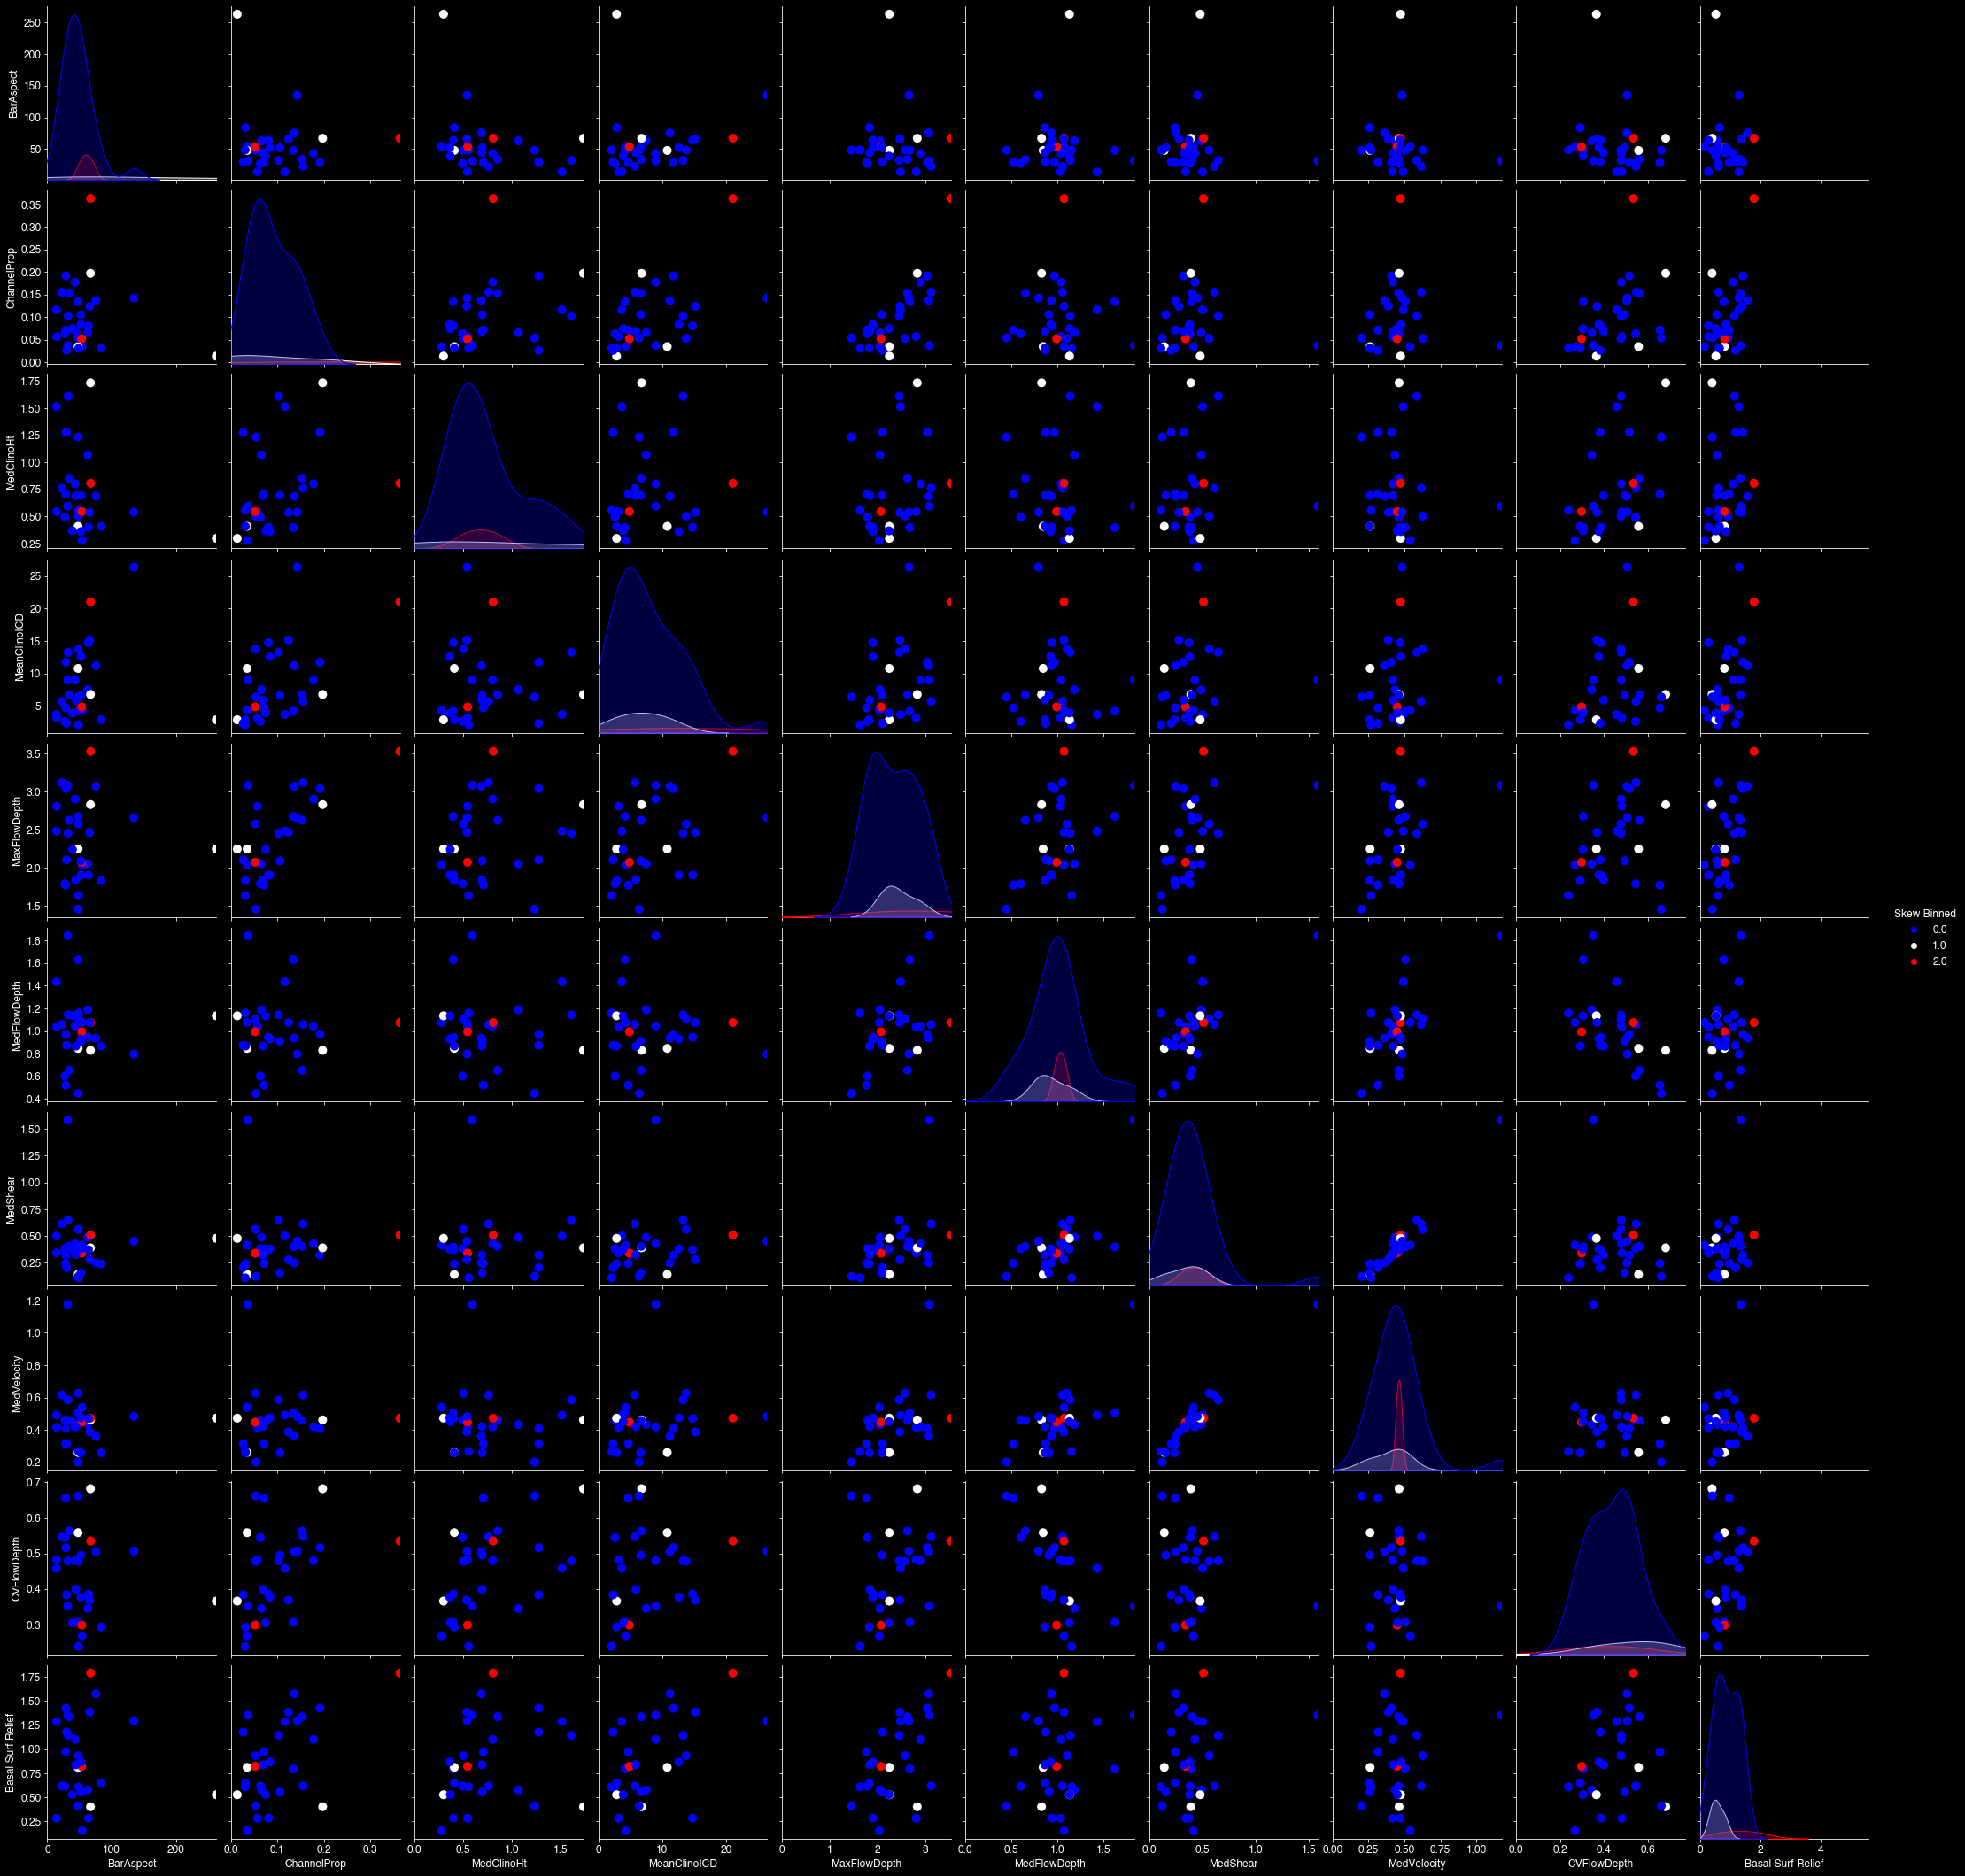

In [46]:
plt.figure(figsize = (15, 15))
with plt.style.context('dark_background'):
    pplot = sns.pairplot(allbars,
                         plot_kws=dict(marker="o", linewidth=0, s = 100, edgecolor = 'w'),
                         vars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                    'MedShear', 'MedVelocity', 'CVFlowDepth', 'Basal Surf Relief'], hue = 'Skew Binned', height = 3, aspect = 1, palette = sns.mpl_palette('seismic', 3))
    snsvars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                    'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness']
    for i, v in enumerate(snsvars):
        pplot.axes[-1, i].set(xlim=(0, allbars[v].max()))

# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
plt.savefig(f'{savefilesto}/pairplot-cbskew.png', dpi = 200)

<Figure size 1080x1080 with 0 Axes>

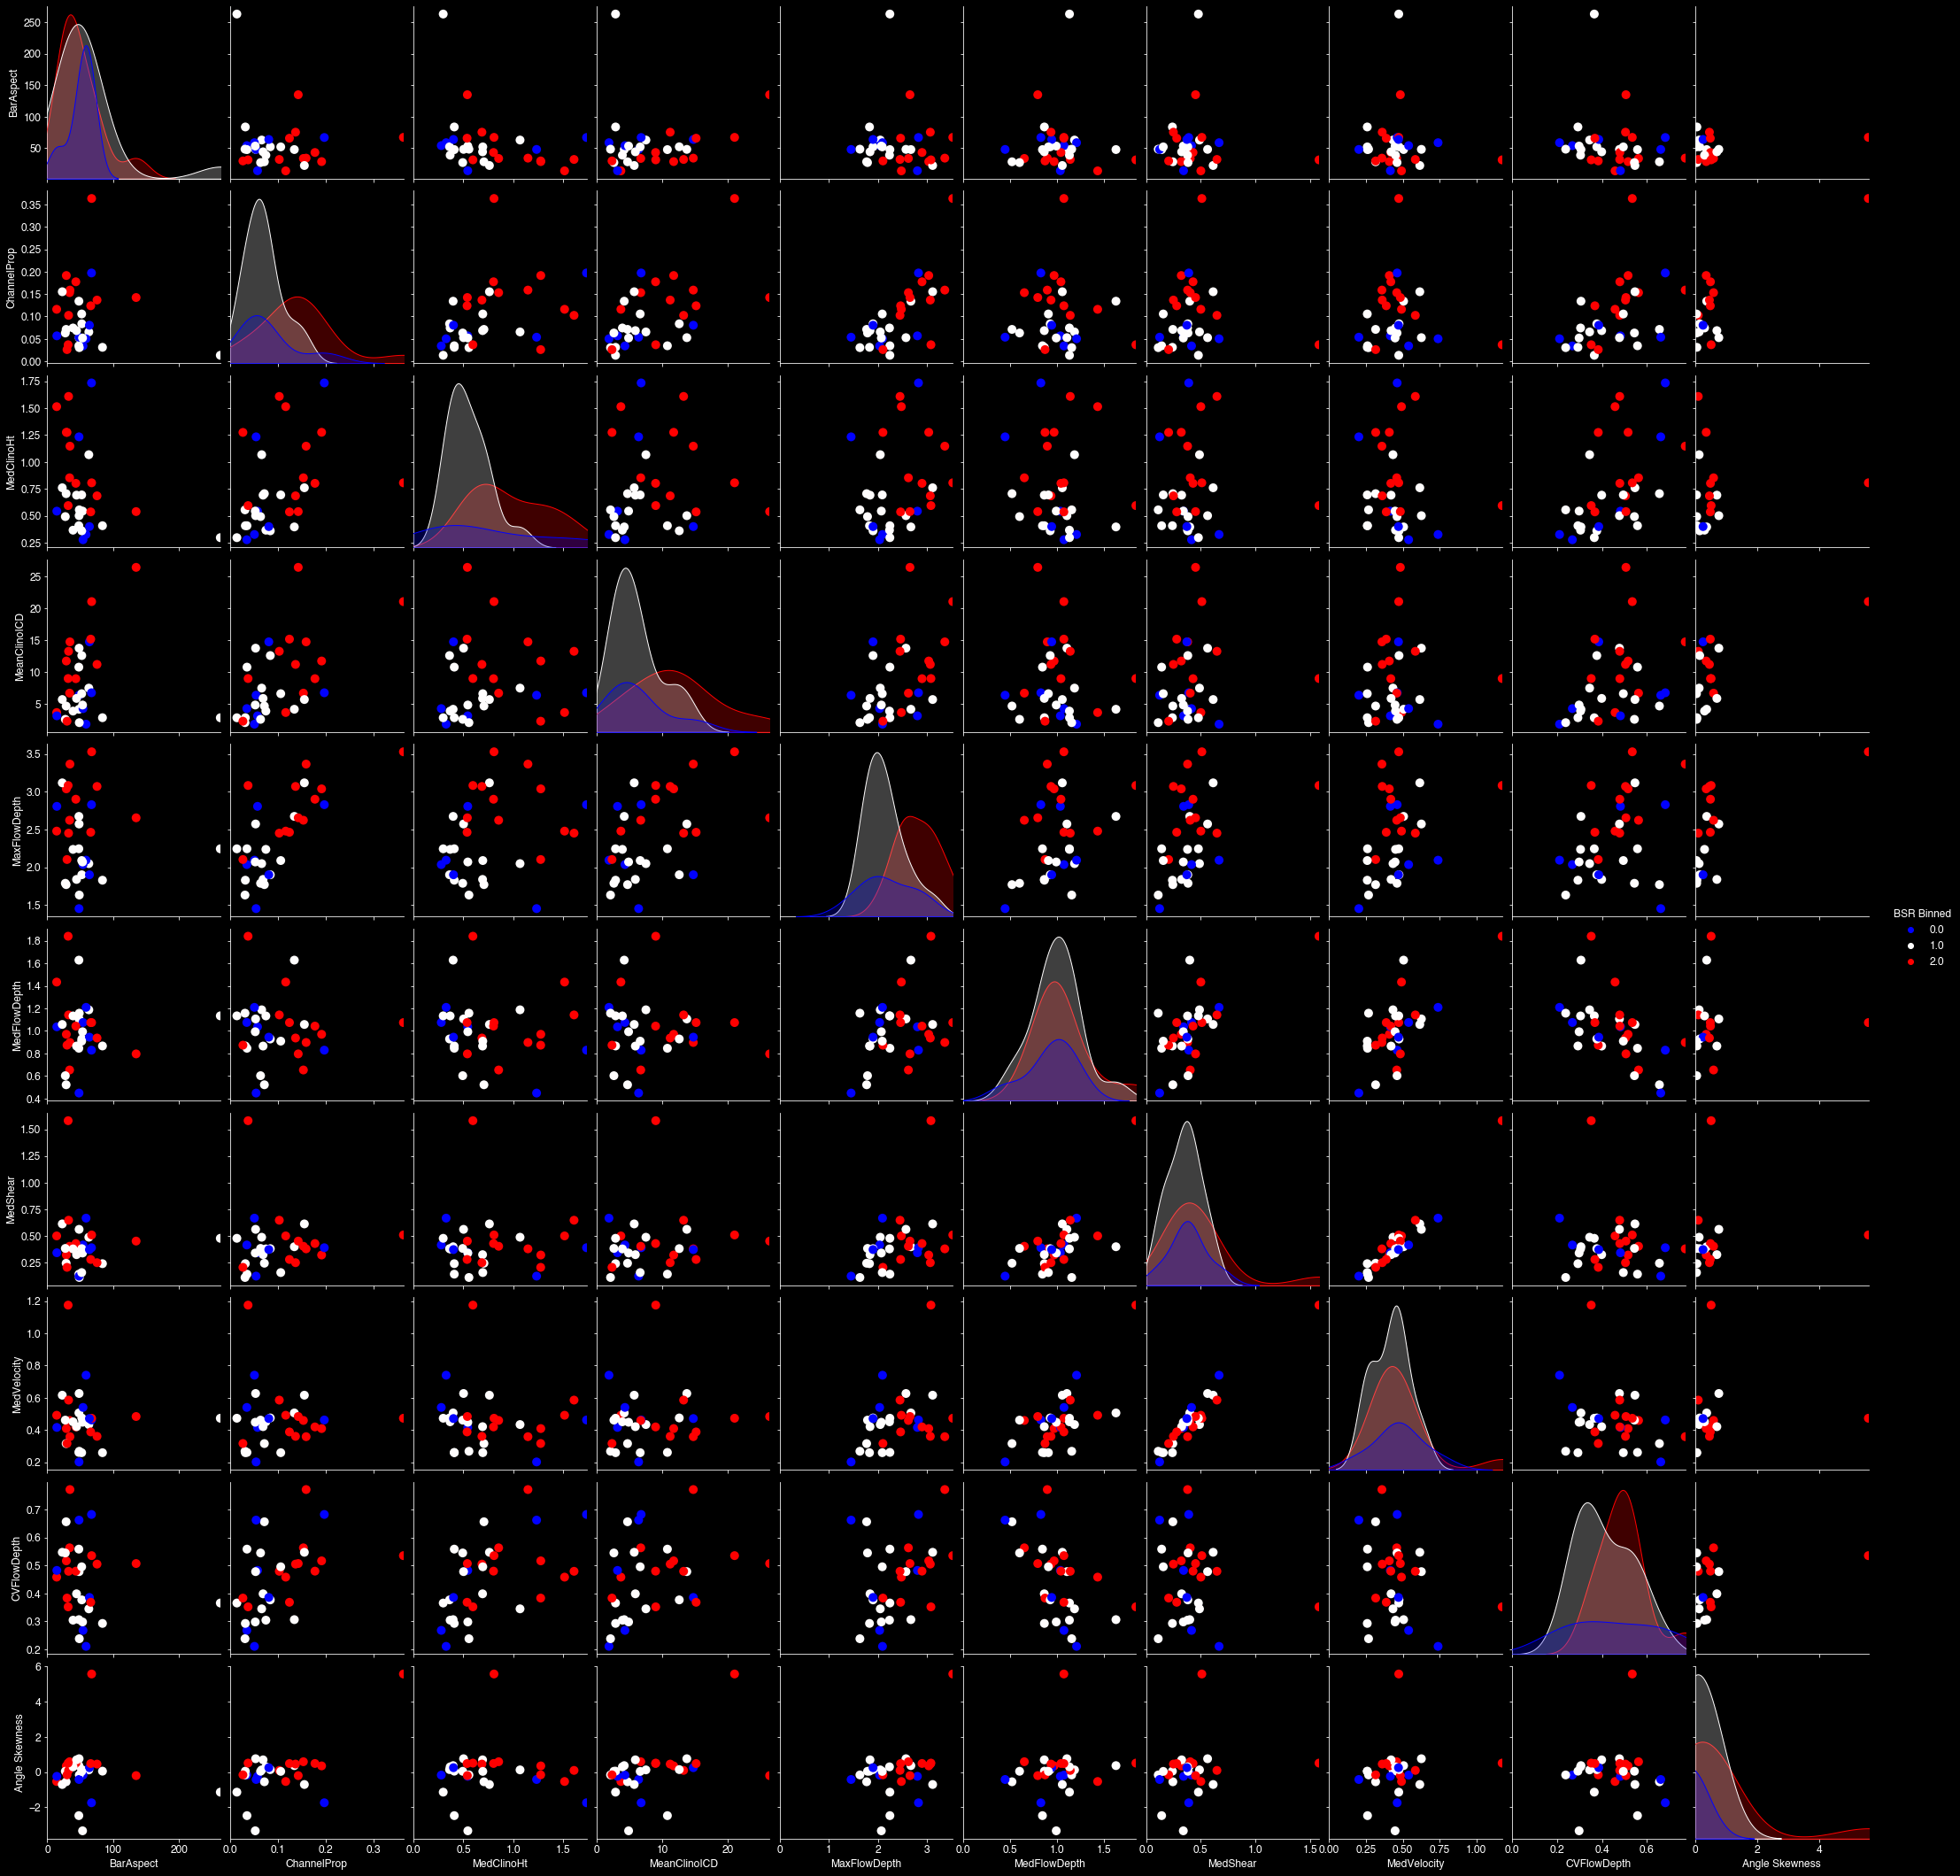

In [49]:
plt.figure(figsize = (15, 15))
with plt.style.context('dark_background'):
    pplot = sns.pairplot(allbars,
                         plot_kws=dict(marker="o", linewidth=0, s = 100, edgecolor = 'w'),
                         vars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                    'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness'], hue = 'BSR Binned', height = 3, aspect = 1, palette = sns.mpl_palette('seismic', 3))
    snsvars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                    'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness']
    for i, v in enumerate(snsvars):
        pplot.axes[-1, i].set(xlim=(0, allbars[v].max()))

# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
plt.savefig(f'{savefilesto}/pairplot-cbbsr-bin.png', dpi = 200)

<Figure size 1080x1080 with 0 Axes>

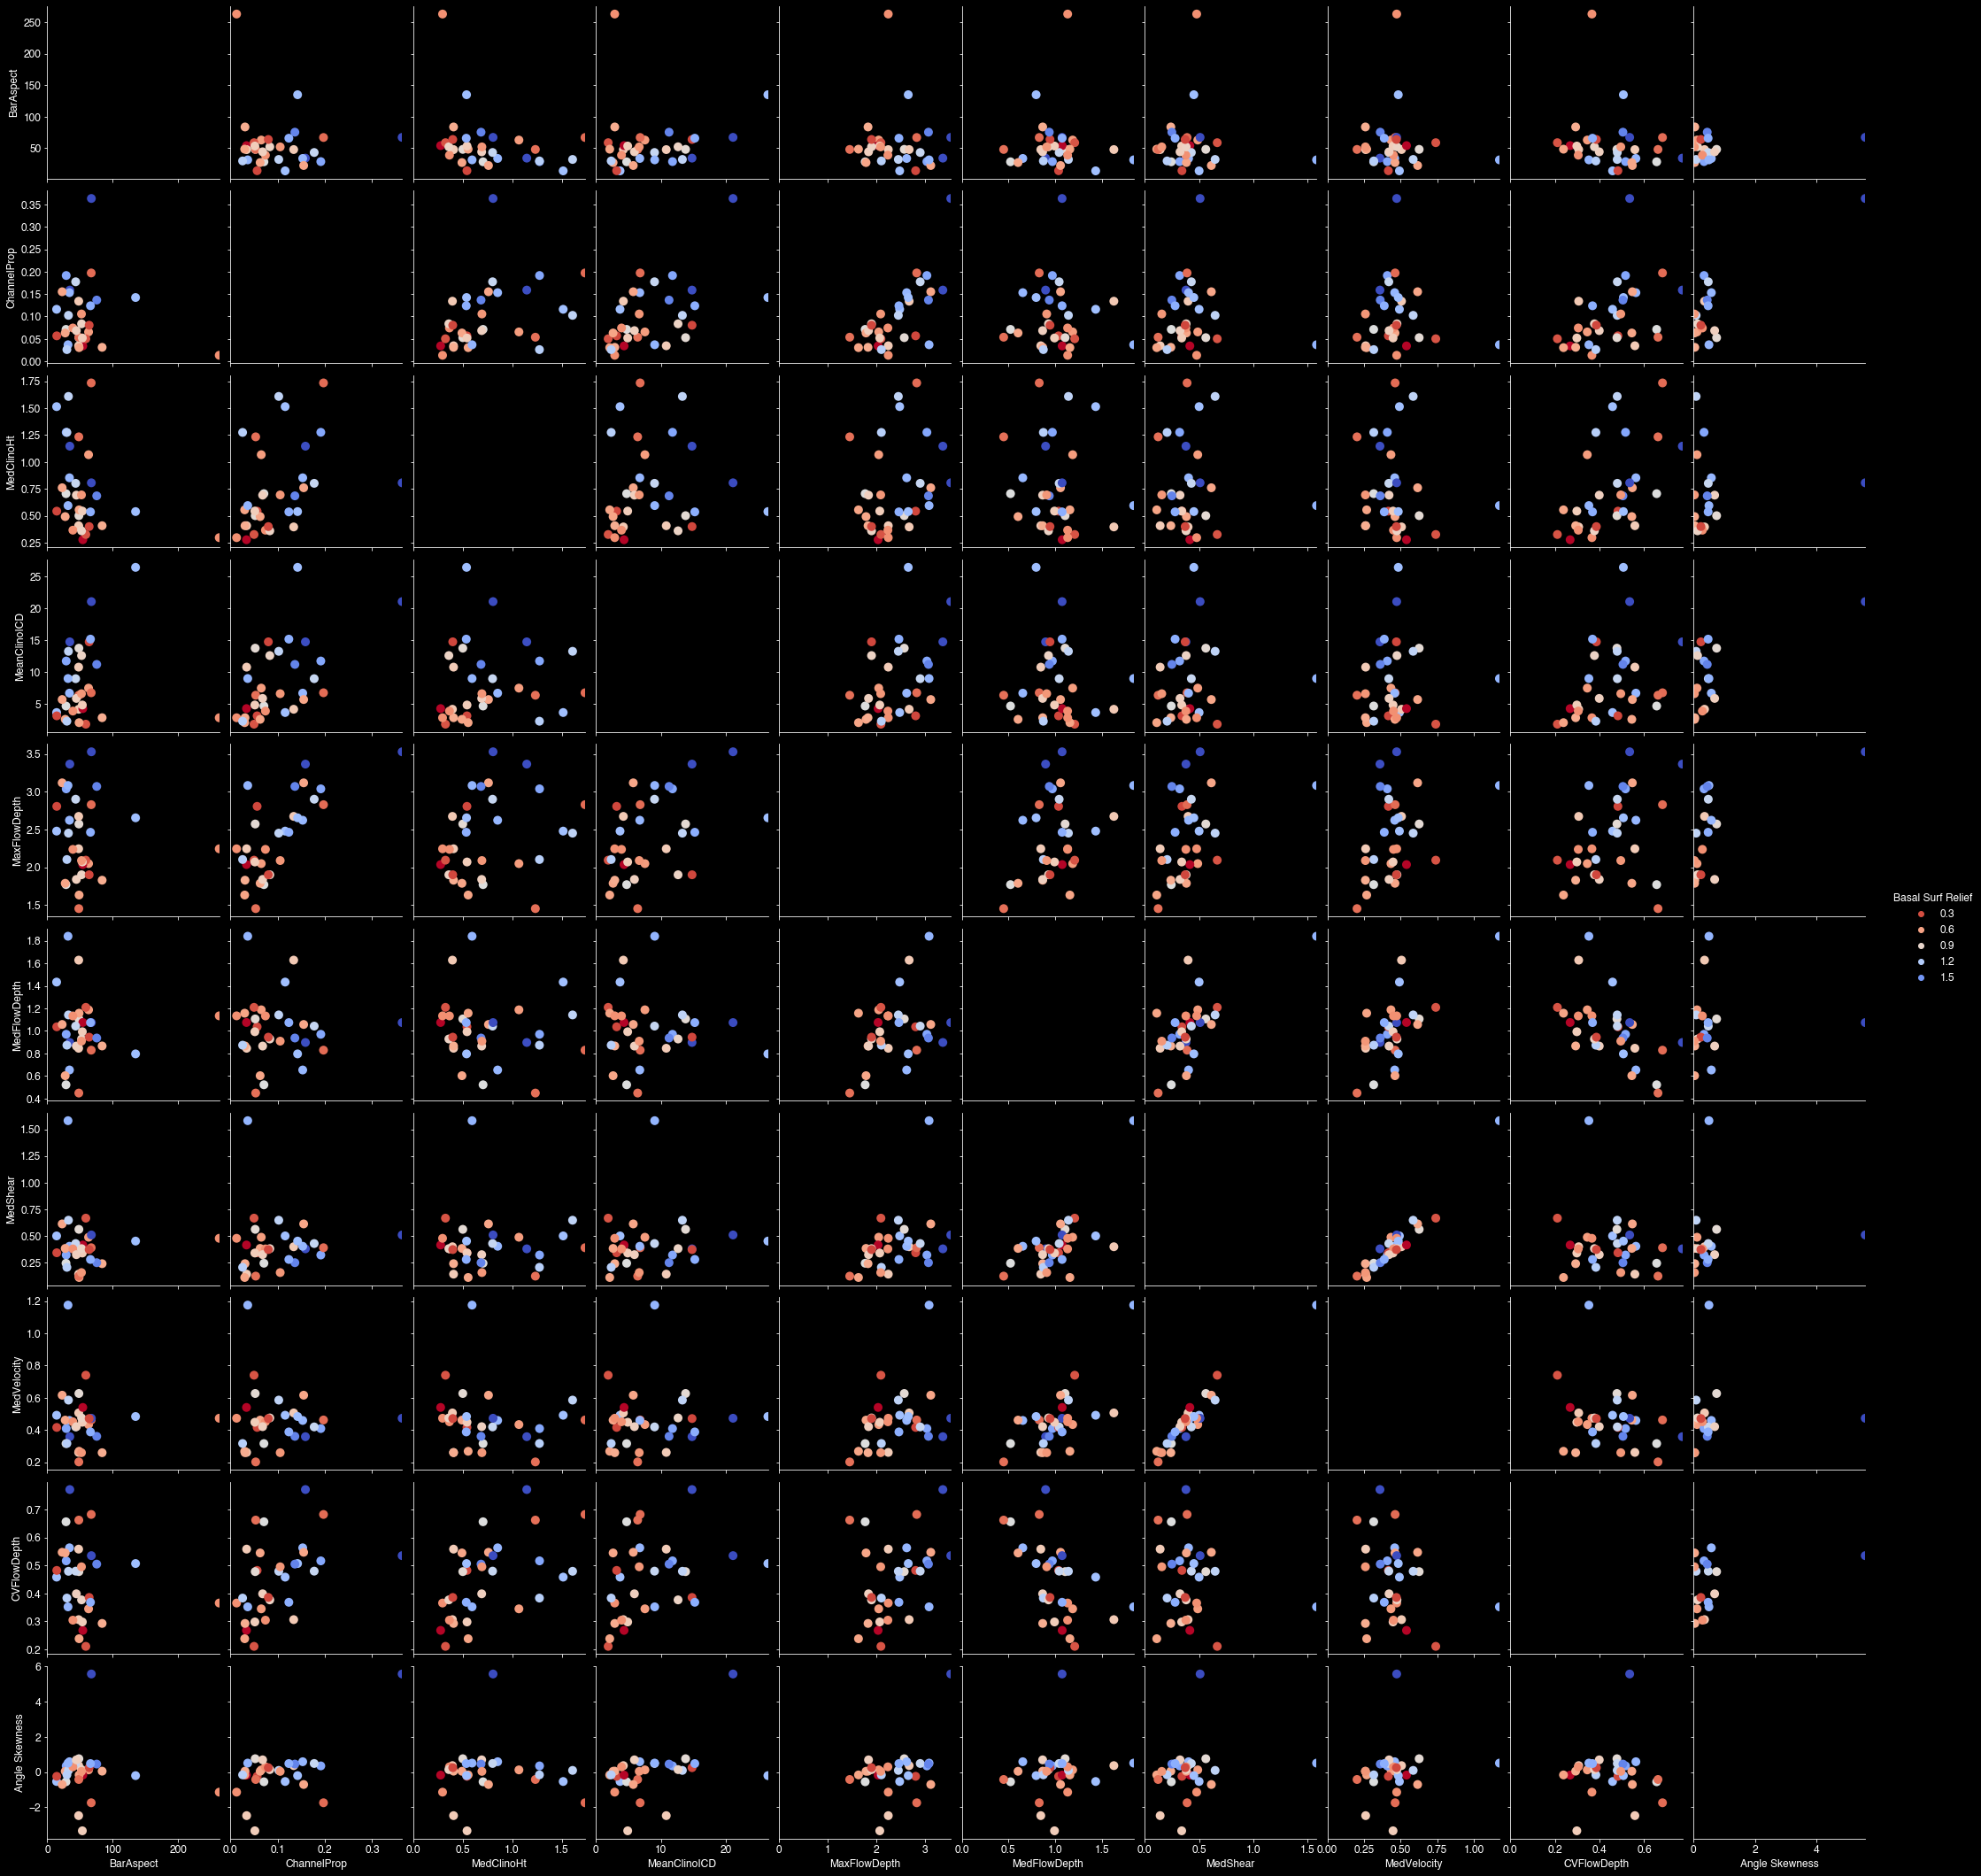

In [18]:
plt.figure(figsize = (15, 15))
with plt.style.context('dark_background'):
    pplot = sns.pairplot(allbars,
                         plot_kws=dict(marker="o", linewidth=0, s = 100),
                         vars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                    'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness'], hue = 'Basal Surf Relief', height = 3, aspect = 1, palette = 'coolwarm_r')
    snsvars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                    'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness']
    for i, v in enumerate(snsvars):
        pplot.axes[-1, i].set(xlim=(0, allbars[v].max()))

# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
plt.savefig(f'{savefilesto}/pairplot-cbbsr.png', dpi = 200)

In [28]:
pplot = sns.pairplot(allbars, vars = ['Angle Skewness', 'Basal Surf Relief'], hue =allbars['BarHeight'], palette = 'Spectral')
plot_kws={"s": 3}

snsvars = ['Angle Skewness', 'Basal Surf Relief']
for i, v in enumerate(snsvars):
    pplot.axes[-1, i].set(xlim=(allbars[v].min(), allbars[v].max()))
    
# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
# plt.savefig(f'{savefilesto}/pairplot-cbskew.png', dpi = 200)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
sns.scatterplot(allbars['Angle Skewness'], allbars['Basal Surf Relief'], hue = allbars[''])